<a href="https://colab.research.google.com/github/Nichapat-k/229352-StatisticalLearning/blob/main/660510739_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [ ]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

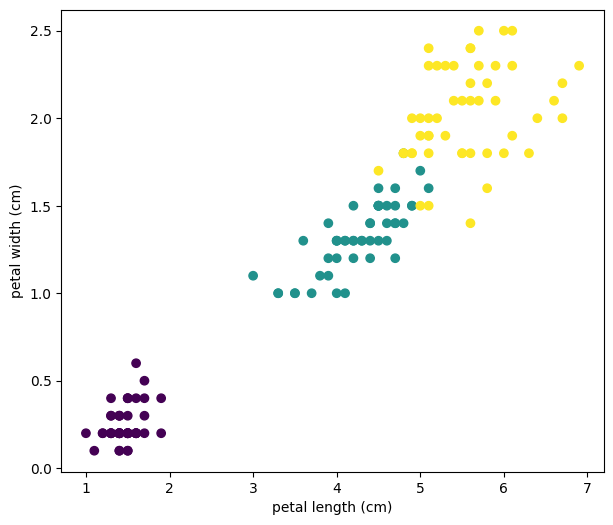

In [ ]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [ ]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [ ]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
print(X_train.shape)
print(X_test.shape)


(105, 2)
(45, 2)


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

<Figure size 640x480 with 0 Axes>

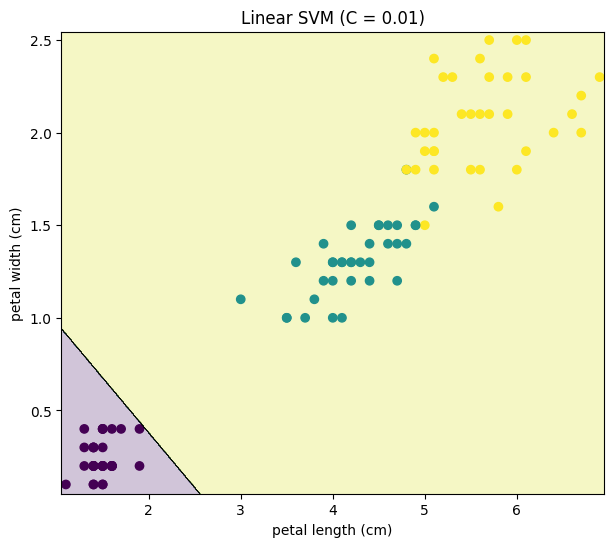

<Figure size 640x480 with 0 Axes>

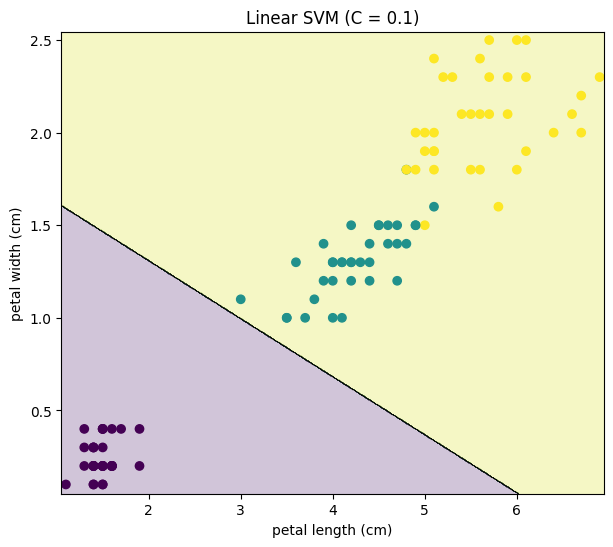

<Figure size 640x480 with 0 Axes>

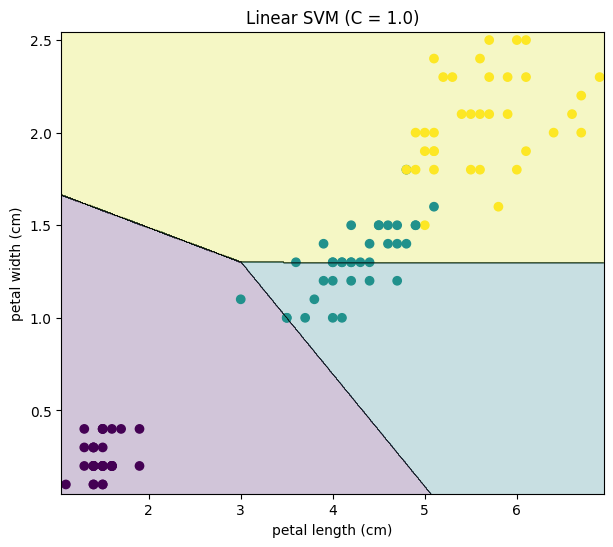

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

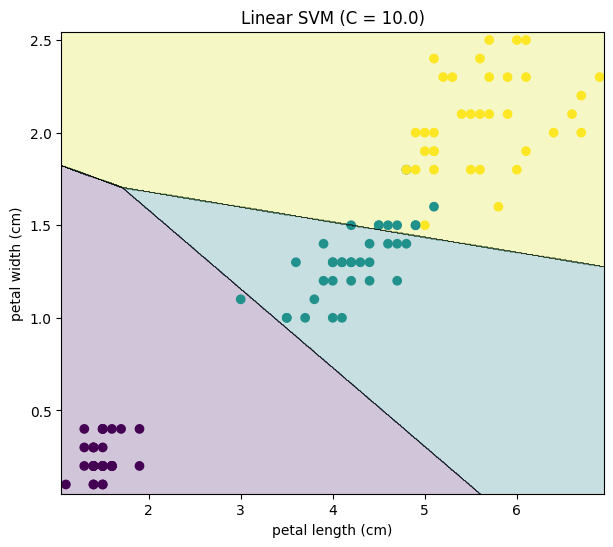

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

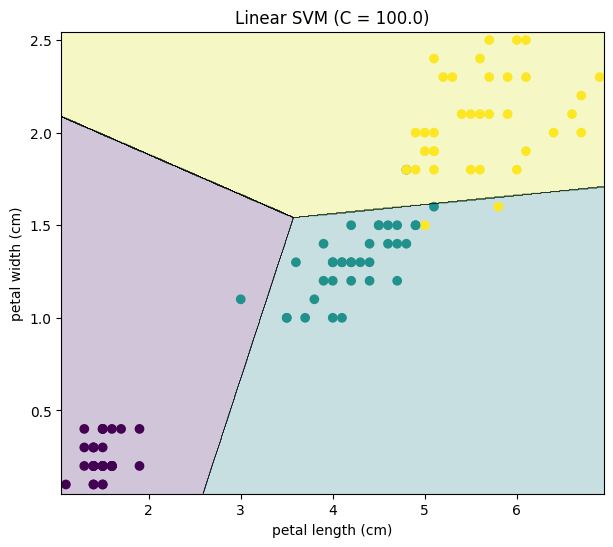

In [ ]:
#TODO
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    clf = LinearSVC(
        C=C,
        loss='hinge',
        max_iter=100000,
        random_state=42
    )
    clf.fit(X_train, y_train)

    plt.figure()
    plot_decision_boundary(clf, X_train, y_train)
    plt.title(f"Linear SVM (C = {C})")
    plt.show()


#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [ ]:

from sklearn.metrics import accuracy_score

clf = LinearSVC(
    C=1.0,
    loss='hinge',
    max_iter=100000,
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy




In [ ]:
print(test_accuracy)

0.6888888888888889


In [ ]:
print(test_error)

0.3111111111111111


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

<Figure size 640x480 with 0 Axes>

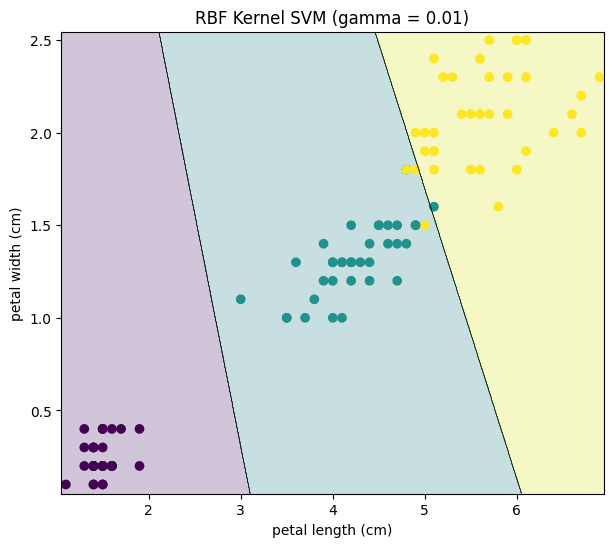

<Figure size 640x480 with 0 Axes>

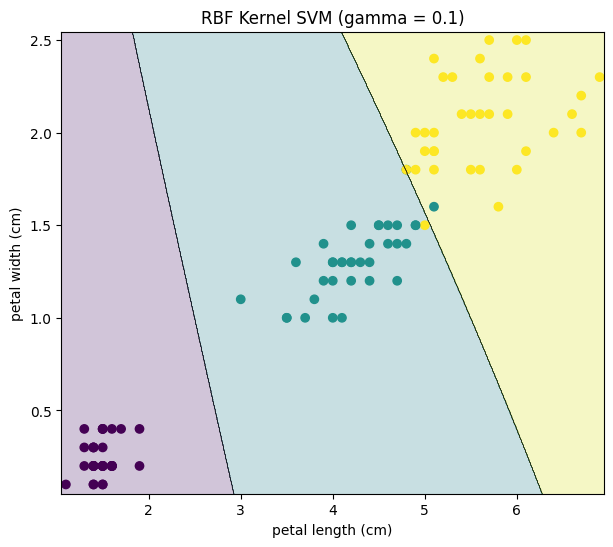

<Figure size 640x480 with 0 Axes>

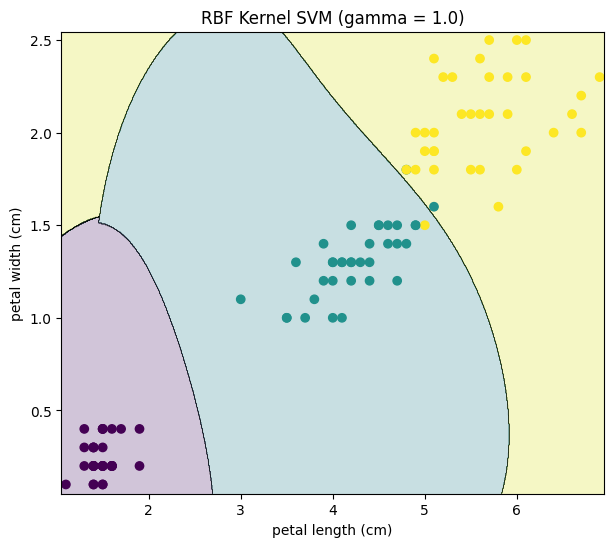

<Figure size 640x480 with 0 Axes>

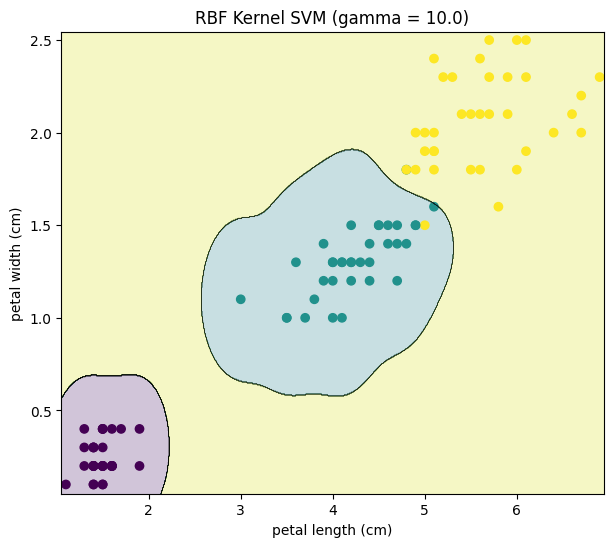

<Figure size 640x480 with 0 Axes>

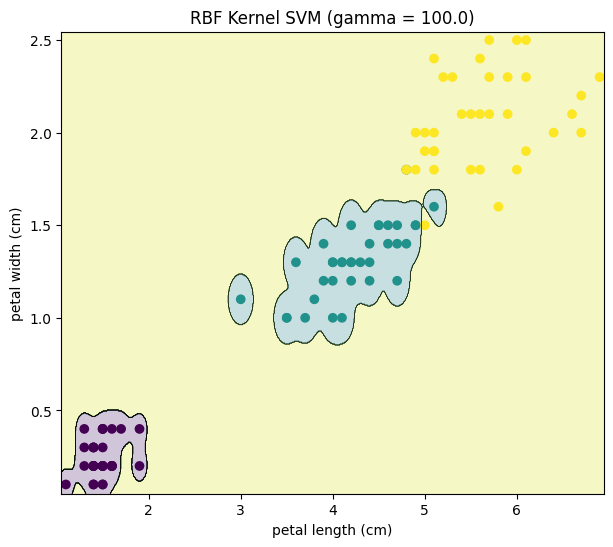

In [ ]:
#TODO
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    clf = SVC(
        kernel='rbf',
        C=1.0,
        gamma=gamma,
        max_iter=100000
    )
    clf.fit(X_train, y_train)

    plt.figure()
    plot_decision_boundary(clf, X_train, y_train)
    plt.title(f"RBF Kernel SVM (gamma = {gamma})")
    plt.show()


#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [ ]:
#TODO
clf = SVC(
    kernel='rbf',
    C=1.0,
    gamma=0.1,
    max_iter=100000
)

clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

# number of support vectors
num_support_vectors = clf.n_support_.sum()




In [ ]:
print(test_error)

0.0444444444444444


In [ ]:
print(num_support_vectors)

37


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [ ]:
linear_accuracy = 1 - 0.3111111111111111 # From Exercise 3
kernel_accuracy = 1 - 0.0444444444444444 # From Exercise 5

print(" Test Accuracy Comparison ")
print(f"Linear SVM Accuracy : {linear_accuracy:.4f}")
print(f"Kernel SVM Accuracy : {kernel_accuracy:.4f}")

 Test Accuracy Comparison 
Linear SVM Accuracy : 0.6889
Kernel SVM Accuracy : 0.9556


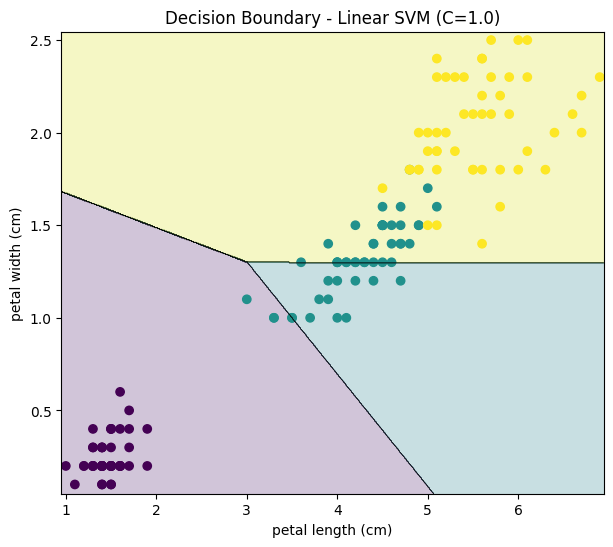

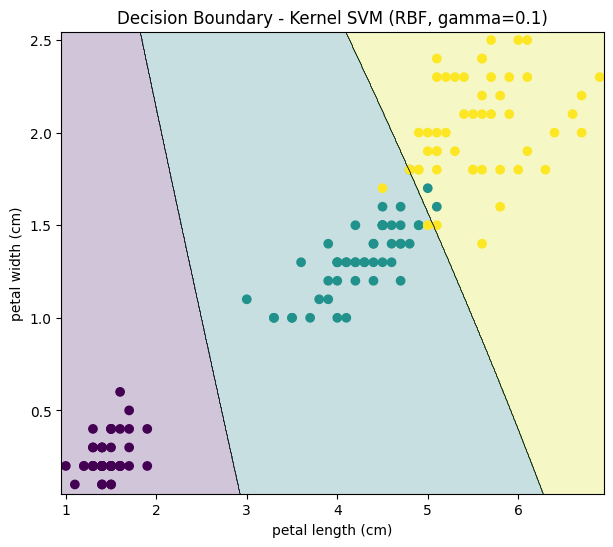

In [ ]:
# Re-train linear_svm with the chosen C value from Exercise 3
linear_svm = LinearSVC(
    C=1.0, # Chosen C from Exercise 3
    loss='hinge',
    max_iter=100000,
    random_state=42
)
linear_svm.fit(X_train, y_train)

# Re-train kernel_svm with the chosen gamma value from Exercise 5
kernel_svm = SVC(
    kernel='rbf',
    C=1.0,
    gamma=0.1, # Chosen gamma from Exercise 5
    max_iter=100000
)
kernel_svm.fit(X_train, y_train)

# Now plot the decision boundaries with the defined models
plot_decision_boundary(linear_svm, X, y)
plt.title("Decision Boundary - Linear SVM (C=1.0)")
plt.show()

plot_decision_boundary(kernel_svm, X, y)
plt.title("Decision Boundary - Kernel SVM (RBF, gamma=0.1)")
plt.show()

ระหว่าง Linear SVM และ Kernel SVM โมเดลที่เหมาะสมกว่าสำหรับการจำแนกข้อมูล Iris คือ Kernel SVM (RBF kernel)

1. test accuracy:
Kernel SVM ให้ค่า test accuracy สูงกว่า Linear SVM
แสดงว่า Kernel SVM สามารถจำแนกข้อมูล Iris บนข้อมูลทดสอบได้แม่นยำกว่า และมีความสามารถในการ generalize ดีกว่า
สรุปจาก Test Accuracy
เนื่องจาก Kernel SVM ให้ความแม่นยำสูงกว่าอย่างมีนัยสำคัญ จึงเป็นโมเดลที่เหมาะสมกว่าสำหรับการจำแนกข้อมูล Iris

2. decision boundary:

Linear SVM
เส้นแบ่งการตัดสินใจเป็นเส้นตรง
ไม่สามารถแยกข้อมูลทั้ง 3 class ได้ดี โดยเฉพาะบริเวณที่ class versicolor และ virginica ทับซ้อนกัน
มีหลายจุดข้อมูลอยู่ใกล้หรือข้ามเส้นแบ่ง > ทำให้เกิด misclassification สูง
สอดคล้องกับค่า test accuracy ที่ต่ำ (0.6889)

Kernel SVM (RBF)
เส้นแบ่งการตัดสินใจมีความยืดหยุ่นและเหมาะสมกับรูปทรงของข้อมูล
สามารถแยกกลุ่มข้อมูลของแต่ละ class ได้ชัดเจนกว่า ลดการทับซ้อนระหว่าง classและลดความผิดพลาดในการจำแนก
ส่งผลให้ได้ test accuracy สูง (0.9556)

สรุปจาก Decision Boundary
Kernel SVM สามารถสร้าง decision boundary ที่สอดคล้องกับลักษณะ non-linear ของข้อมูล Iris ได้ดีกว่า Linear SVM

In [ ]:
#TODO